In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
# Take the Date column in the form of datetime

df = pd.read_csv(url , parse_dates=['Date'])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [7]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### crearte the new columns with month year day weekday

In [9]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [10]:
df['weekday'] = df['Date'].dt.weekday

In [11]:
df.head()

,Date,Temp,year,month,day,weekday
0,1981-01-01,20.7,1981,1,1,3
1,1981-01-02,17.9,1981,1,2,4
2,1981-01-03,18.8,1981,1,3,5
3,1981-01-04,14.6,1981,1,4,6
4,1981-01-05,15.8,1981,1,5,0


### Average temperature of each year

In [12]:
df[['year','Temp']].groupby('year').agg(  { "Temp": ['mean', 'max', 'min']} )

Temp           
           mean   max  min
year                      
1981  11.517260  25.0  2.1
1982  10.783562  26.3  0.0
1983  11.187397  22.5  0.0
1984  10.591781  24.3  0.1
1985  11.137534  22.4  0.3
1986  10.803288  21.4  0.8
1987  10.853151  24.1  1.5
1988  11.972055  23.9  2.8
1989  11.261918  22.0  0.5
1990  11.669589  22.1  2.1

### Average temperature of each month

In [13]:
df[['month','Temp']].groupby('month').agg(   ['mean', 'max', 'min','std'] )

Temp                     
            mean   max  min       std
month                                
1      15.030323  25.2  8.5  2.872859
2      15.373759  26.3  9.2  2.742785
3      14.565484  22.4  7.4  3.193744
4      12.088333  21.8  5.7  3.082299
5       9.866452  16.5  2.1  2.793387
6       7.278333  13.0  0.0  2.643746
7       6.692581  13.0  0.0  2.627618
8       7.891290  14.3  1.7  2.334022
9       8.976333  19.2  3.0  2.795901
10     10.309355  18.4  4.7  2.687778
11     12.479667  24.3  5.7  2.957246
12     13.851948  23.9  8.2  2.481534

In [14]:
df[['weekday','Temp']].groupby('weekday').agg(   ['mean', 'max', 'min','std'] )

Temp                     
              mean   max  min       std
weekday                                
0        11.156238  26.3  0.7  4.163006
1        11.252975  22.5  0.2  3.986964
2        11.337620  25.2  0.3  4.002188
3        11.192720  25.0  0.9  4.042949
4        11.161877  23.9  0.7  4.094730
5        11.114587  23.4  0.0  4.107111
6        11.028544  24.8  0.0  4.119036

### to apply resample() and rolling() effectively in pandas on time-based logic, the index must be a DatetimeIndex

### set the index to datetime

In [15]:
df.set_index("Date",inplace=True)

In [16]:
df.head()

,Temp,year,month,day,weekday
Date,,,,,
1981-01-01,20.7,1981,1,1,3
1981-01-02,17.9,1981,1,2,4
1981-01-03,18.8,1981,1,3,5
1981-01-04,14.6,1981,1,4,6
1981-01-05,15.8,1981,1,5,0


In [17]:
df

,Temp,year,month,day,weekday
Date,,,,,
1981-01-01,20.7,1981,1,1,3
1981-01-02,17.9,1981,1,2,4
1981-01-03,18.8,1981,1,3,5
1981-01-04,14.6,1981,1,4,6
1981-01-05,15.8,1981,1,5,0
...,...,...,...,...,...
1990-12-27,14.0,1990,12,27,3
1990-12-28,13.6,1990,12,28,4
1990-12-29,13.5,1990,12,29,5


In [18]:
monthly_avg = df.resample('ME').mean()

print(monthly_avg)

                 Temp    year  month   day   weekday
Date                                                
1981-01-31  17.712903  1981.0    1.0  16.0  3.096774
1981-02-28  17.678571  1981.0    2.0  14.5  3.000000
1981-03-31  13.500000  1981.0    3.0  16.0  2.935484
1981-04-30  12.356667  1981.0    4.0  15.5  2.966667
1981-05-31   9.490323  1981.0    5.0  16.0  3.193548
...               ...     ...    ...   ...       ...
1990-08-31   7.825806  1990.0    8.0  16.0  3.000000
1990-09-30   9.166667  1990.0    9.0  15.5  3.166667
1990-10-31  11.345161  1990.0   10.0  16.0  2.806452
1990-11-30  12.656667  1990.0   11.0  15.5  3.033333
1990-12-31  14.367742  1990.0   12.0  16.0  3.064516

[120 rows x 5 columns]


In [19]:
yearly_avg = df.resample('YE').agg(['min','mean'])

print(yearly_avg)

           Temp             year         month           day             \
            min       mean   min    mean   min      mean min       mean   
Date                                                                      
1981-12-31  2.1  11.517260  1981  1981.0     1  6.526027   1  15.720548   
1982-12-31  0.0  10.783562  1982  1982.0     1  6.526027   1  15.720548   
1983-12-31  0.0  11.187397  1983  1983.0     1  6.526027   1  15.720548   
1984-12-31  0.1  10.591781  1984  1984.0     1  6.498630   1  15.715068   
1985-12-31  0.3  11.137534  1985  1985.0     1  6.526027   1  15.720548   
1986-12-31  0.8  10.803288  1986  1986.0     1  6.526027   1  15.720548   
1987-12-31  1.5  10.853151  1987  1987.0     1  6.526027   1  15.720548   
1988-12-31  2.8  11.972055  1988  1988.0     1  6.498630   1  15.715068   
1989-12-31  0.5  11.261918  1989  1989.0     1  6.526027   1  15.720548   
1990-12-31  2.1  11.669589  1990  1990.0     1  6.526027   1  15.720548   

           weekday      

In [20]:
df[['year','Temp','month']].resample('YE').mean()

,year,Temp,month
Date,,,
1981-12-31,1981.0,11.517260,6.526027
1982-12-31,1982.0,10.783562,6.526027
1983-12-31,1983.0,11.187397,6.526027
1984-12-31,1984.0,10.591781,6.498630
1985-12-31,1985.0,11.137534,6.526027
1986-12-31,1986.0,10.803288,6.526027
1987-12-31,1987.0,10.853151,6.526027
1988-12-31,1988.0,11.972055,6.498630
1989-12-31,1989.0,11.261918,6.526027


### Rolling Window (7-day & 30-day moving average)

In [21]:
df['7_day_avg'] = df['Temp'].rolling(window=7).mean()
df['30_day_avg'] = df['Temp'].rolling(window=30).mean()

In [22]:
df

,Temp,year,month,day,weekday,7_day_avg,30_day_avg
Date,,,,,,,
1981-01-01,20.7,1981,1,1,3,NaN,NaN
1981-01-02,17.9,1981,1,2,4,NaN,NaN
1981-01-03,18.8,1981,1,3,5,NaN,NaN
1981-01-04,14.6,1981,1,4,6,NaN,NaN
1981-01-05,15.8,1981,1,5,0,NaN,NaN
...,...,...,...,...,...,...,...
1990-12-27,14.0,1990,12,27,3,13.100000,14.390000
1990-12-28,13.6,1990,12,28,4,13.171429,14.353333
1990-12-29,13.5,1990,12,29,5,13.214286,14.313333


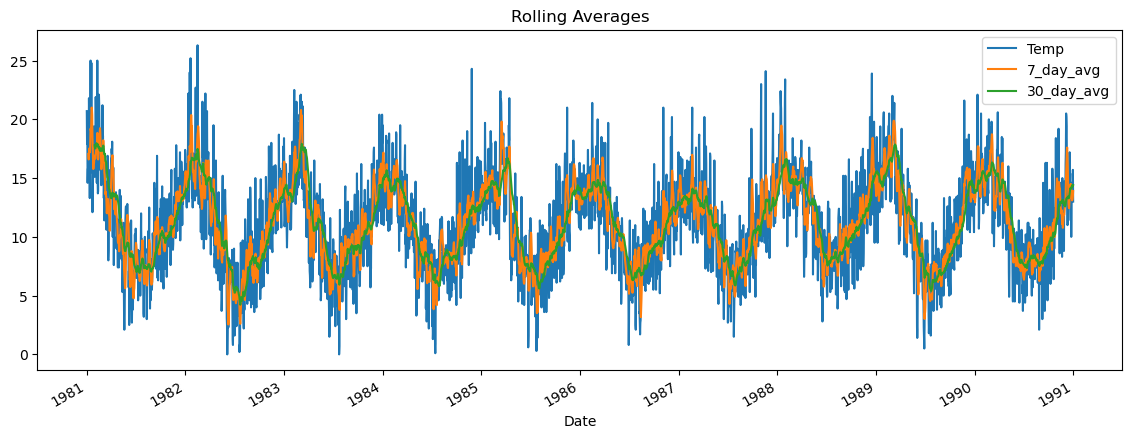

In [23]:
df[['Temp', '7_day_avg', '30_day_avg']].plot(figsize=(14, 5), title='Rolling Averages')
plt.show()

In [24]:
df['Temp_Diff'] = df['Temp'].diff()
df

,Temp,year,month,day,weekday,7_day_avg,30_day_avg,Temp_Diff
Date,,,,,,,,
1981-01-01,20.7,1981,1,1,3,NaN,NaN,NaN
1981-01-02,17.9,1981,1,2,4,NaN,NaN,-2.8
1981-01-03,18.8,1981,1,3,5,NaN,NaN,0.9
1981-01-04,14.6,1981,1,4,6,NaN,NaN,-4.2
1981-01-05,15.8,1981,1,5,0,NaN,NaN,1.2
...,...,...,...,...,...,...,...,...
1990-12-27,14.0,1990,12,27,3,13.100000,14.390000,-0.6
1990-12-28,13.6,1990,12,28,4,13.171429,14.353333,-0.4
1990-12-29,13.5,1990,12,29,5,13.214286,14.313333,-0.1


In [25]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

In [26]:
df = pd.read_csv(url , parse_dates=['Month'])

In [27]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [28]:
df['year'] = df['Month'].dt.year
df['month'] = df['Month'].dt.month

In [29]:
df

,Month,Passengers,year,month
0,1949-01-01,112,1949,1
1,1949-02-01,118,1949,2
2,1949-03-01,132,1949,3
3,1949-04-01,129,1949,4
4,1949-05-01,121,1949,5
...,...,...,...,...
139,1960-08-01,606,1960,8
140,1960-09-01,508,1960,9
141,1960-10-01,461,1960,10
142,1960-11-01,390,1960,11


### find the min max and average passangers travelled per year

In [30]:
Passengers = df[['year','Passengers']].groupby('year').agg(['min','max','mean'])

In [31]:
Passengers

Passengers                 
            min  max        mean
year                            
1949        104  148  126.666667
1950        114  170  139.666667
1951        145  199  170.166667
1952        171  242  197.000000
1953        180  272  225.000000
1954        188  302  238.916667
1955        233  364  284.000000
1956        271  413  328.250000
1957        301  467  368.416667
1958        310  505  381.000000
1959        342  559  428.333333
1960        390  622  476.166667

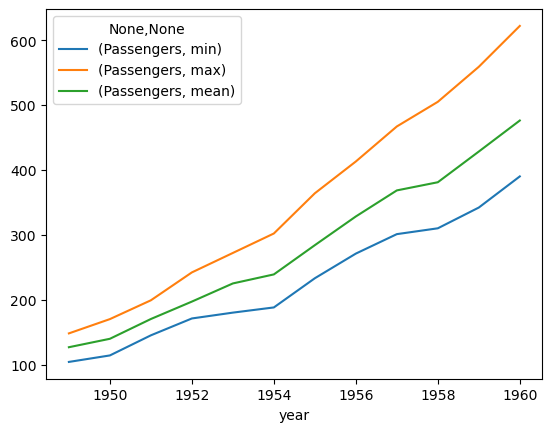

In [32]:
Passengers.plot()
plt.show()

### find the min max and average passangers travelled per month

In [33]:
Passengers = df[['month','Passengers']].groupby('month').agg(['min','max','mean'])

In [34]:
Passengers

Passengers                 
             min  max        mean
month                            
1            112  417  241.750000
2            118  391  235.000000
3            132  419  270.166667
4            129  461  267.083333
5            121  472  271.833333
6            135  535  311.666667
7            148  622  351.333333
8            148  606  351.083333
9            136  508  302.416667
10           119  461  266.583333
11           104  390  232.833333
12           118  432  261.833333

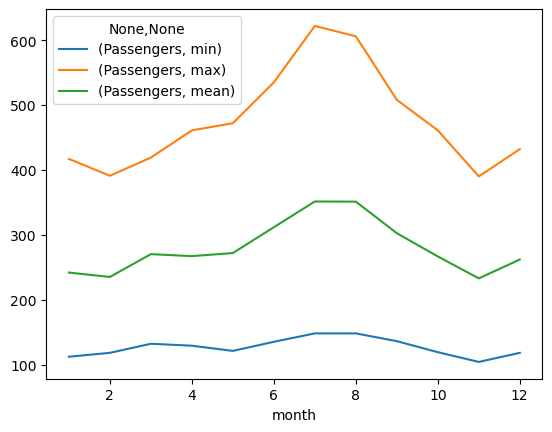

In [35]:
Passengers.plot()
plt.show()

### find the min max and average passangers travelled per year and month

In [36]:
Passengers = df[['year','month','Passengers']].groupby(['year','month']).agg(['min','max','mean'])

In [37]:
Passengers

Passengers            
                  min  max   mean
year month                       
1949 1            112  112  112.0
     2            118  118  118.0
     3            132  132  132.0
     4            129  129  129.0
     5            121  121  121.0
...               ...  ...    ...
1960 8            606  606  606.0
     9            508  508  508.0
     10           461  461  461.0
     11           390  390  390.0
     12           432  432  432.0

[144 rows x 3 columns]

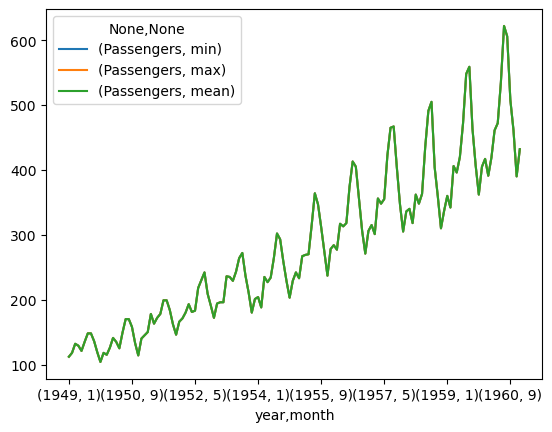

In [38]:
Passengers.plot()
plt.show()